In [2]:
import pathlib
import os
import textwrap
import google.generativeai as genai
from dotenv import load_dotenv
load_dotenv()
from IPython.display import display
from IPython.display import Markdown
from IPython.display import Image
from IPython.core.display import HTML


/Users/joeljoseph26/Documents/Education/Machine_and_Deep_Learning/LLMs/GoogleGemini/GoogleGemini/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Alternate option for Google-Generativeai

In [3]:
# Drawn from https://cloud.google.com/vertex-ai/docs/generative-ai/migrate/migrate-palm-to-gemini
# import os
# import json

# import vertexai
# from vertexai.preview.generative_models import GenerativeModel
# from google.oauth2.service_account import Credentials
# from dotenv import load_dotenv

# load_dotenv()

# PROJECT = "..."
# LOCATION = "us-central1"

# # Import credentials 
# service_account_json_string = os.getenv('GCP_SERVICE_ACCOUNT_JSON')
# service_account_info = json.loads(service_account_json_string)
# google_credentials = Credentials.from_service_account_info(service_account_info)


# # Initialize Vertex AI
# vertexai.init(project=PROJECT, location=LOCATION, credentials=google_credentials)

# # Start prediction
# model = GenerativeModel("gemini-pro")

# responses = model.generate_content("The sun's colour is ", stream=True)

# for response in responses:
#     print(response.text)

In [4]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [5]:
genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [7]:
model = genai.GenerativeModel('gemini-pro')

In [8]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 10.9 ms, sys: 8.65 ms, total: 19.6 ms
Wall time: 6.36 s


In [9]:
to_markdown(response.text)

> The meaning of life is a philosophical question that has been debated for centuries. There is no one answer that is universally agreed upon, as the meaning of life is subjective and personal. However, some common themes that have emerged from this debate include:
> 
> **Happiness:** Many people believe that the meaning of life is to be happy. This can be achieved through a variety of means, such as pursuing one's passions, spending time with loved ones, or helping others.
> 
> **Purpose:** Some people believe that the meaning of life is to find a purpose or calling. This can be something that one is passionate about, something that one is good at, or something that one believes is making a positive contribution to the world.
> 
> **Legacy:** Some people believe that the meaning of life is to leave a lasting legacy. This can be achieved through one's work, one's relationships, or one's contributions to society.
> 
> **Self-Actualization:** Some people believe that the meaning of life is to achieve self-actualization. This is a state of being in which one is fully aware of and using one's potential. It is characterized by a sense of purpose, fulfillment, and well-being.
> 
> **Connection:** Some people believe that the meaning of life is to connect with others. This can be achieved through relationships, community involvement, or shared experiences.
> 
> **Contribution:** Some people believe that the meaning of life is to contribute to something greater than oneself. This can be achieved through volunteering, donating to charity, or working to improve the world in some way.
> 
> Ultimately, the meaning of life is a personal journey. There is no right or wrong answer, and what one person finds meaningful may not be meaningful to another. The important thing is to find a meaning that resonates with you and that gives you a sense of purpose and fulfillment.

In [10]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [11]:
response.candidates

[index: 0
content {
  parts {
    text: "The meaning of life is a philosophical question that has been debated for centuries. There is no one answer that is universally agreed upon, as the meaning of life is subjective and personal. However, some common themes that have emerged from this debate include:\n\n**Happiness:** Many people believe that the meaning of life is to be happy. This can be achieved through a variety of means, such as pursuing one\'s passions, spending time with loved ones, or helping others.\n\n**Purpose:** Some people believe that the meaning of life is to find a purpose or calling. This can be something that one is passionate about, something that one is good at, or something that one believes is making a positive contribution to the world.\n\n**Legacy:** Some people believe that the meaning of life is to leave a lasting legacy. This can be achieved through one\'s work, one\'s relationships, or one\'s contributions to society.\n\n**Self-Actualization:** Some peopl

In [12]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 5.53 ms, sys: 4.57 ms, total: 10.1 ms
Wall time: 1.55 s


In [13]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a philosophical and spiritual question that has been asked for centuries
________________________________________________________________________________
. There is no one answer that is universally accepted, as the meaning of life is a deeply personal and subjective experience. Some people believe that the meaning of life
________________________________________________________________________________
 is to find happiness and fulfillment, while others believe that it is to make a difference in the world or to leave a lasting legacy. Still others believe that the meaning of life is to connect with something greater than oneself, such as God or the universe.

Ultimately, the meaning of life is whatever you make it to
________________________________________________________________________________
 be. There is no right or wrong answer, and what is meaningful to one person may not be meaningful to another. The important thing is to find what gives your life meanin

In [14]:
response = model.generate_content("What is the meaning of life?", stream=True)

In [15]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [16]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

In [55]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

zsh:1: no matches found: https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw


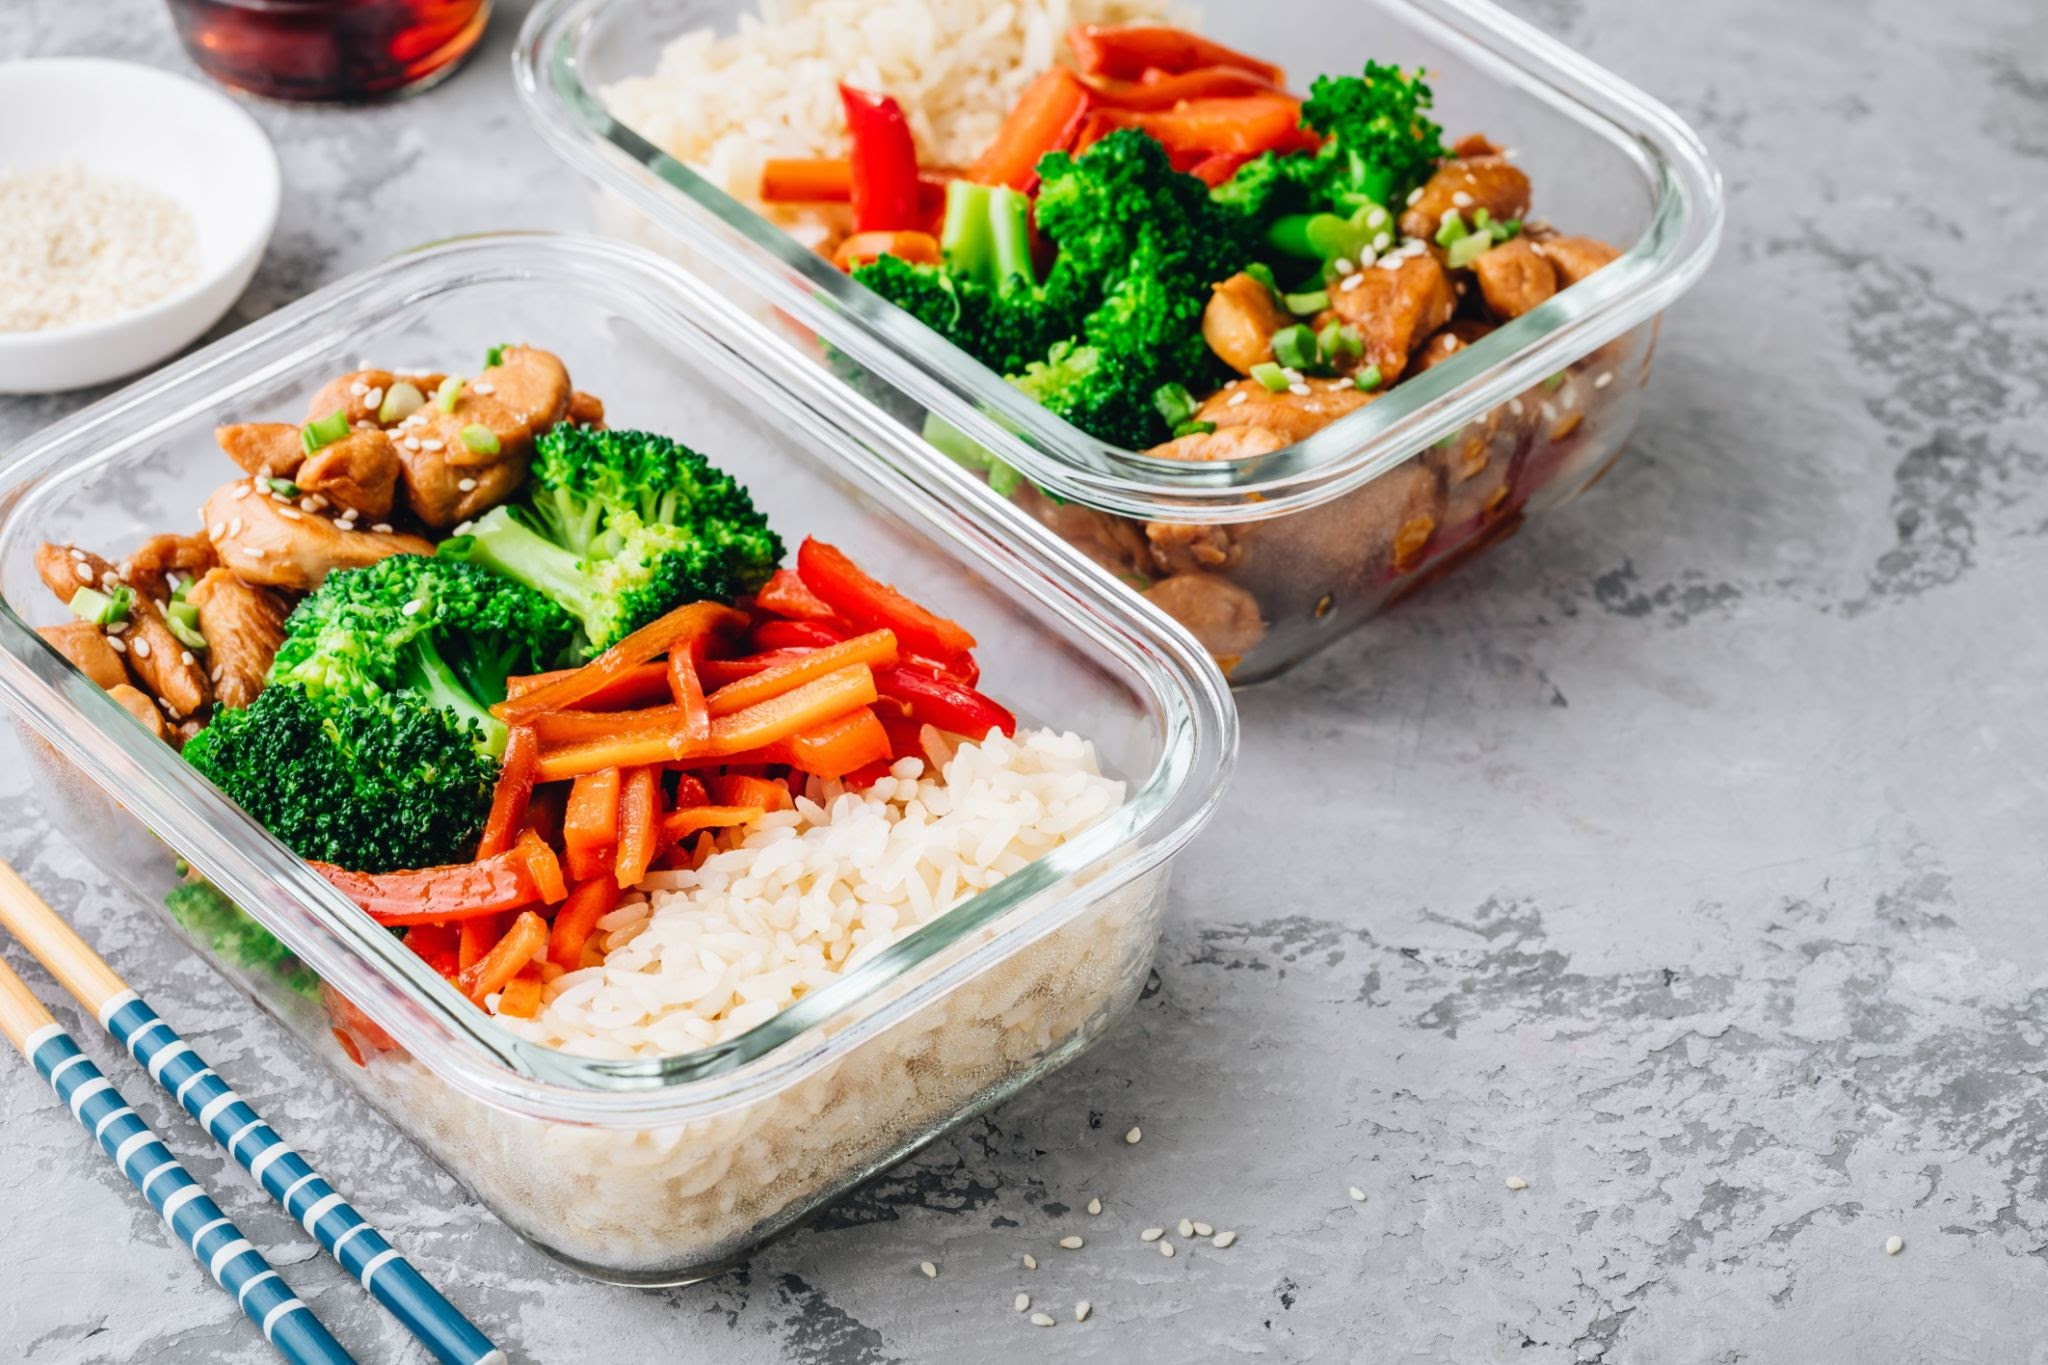

In [17]:
import PIL.Image

# img = PIL.Image.open('image.jpg')
img = Image('image.jpg')
img

In [18]:
model = genai.GenerativeModel('gemini-pro-vision')

In [19]:
response = model.generate_content(img)

to_markdown(response.text)

>  Chicken Teriyaki Meal Prep Bowls with brown rice and vegetables

In [20]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [21]:
to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. When you meal prep, you cook a large batch of food ahead of time and then portion it out into individual meals. This makes it easy to grab a healthy meal on busy weeknights.
> 
> There are many different ways to meal prep, but I find that the most successful method is to choose a few recipes that you like and then cook them in large batches. I usually cook enough food for 4-5 meals at a time. Once the food is cooked, I portion it out into individual containers and store it in the refrigerator or freezer.
> 
> One of my favorite meal prep recipes is this chicken and vegetable stir-fry. It's a healthy and satisfying meal that is perfect for busy weeknights. The stir-fry is made with chicken, broccoli, carrots, and bell peppers, and it is served over brown rice.
> 
> To make the stir-fry, I start by cooking the chicken in a large skillet. Once the chicken is cooked, I add the vegetables and cook them until they are tender. Finally, I add the soy sauce, ginger, and garlic and cook for a few more minutes.
> 
> I serve the stir-fry over brown rice, which is a healthy and whole grain. Brown rice is a good source of fiber, which can help to keep you feeling full and satisfied.
> 
> This chicken and vegetable stir-fry is a great meal prep recipe because it is healthy, satisfying, and easy to make. It is also a versatile recipe that can be easily customized to your liking. If you don't have any chicken on hand, you can use tofu or tempeh instead. You can also add any vegetables that you like to the stir-fry.
> 
> If you're looking for a healthy and easy way to meal prep, I encourage you to give this chicken and vegetable stir-fry a try. It's a delicious and nutritious meal that is perfect for busy weeknights.

In [22]:
#Chat Conversations
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [23]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> Computers use electricity to do math really fast and show us the results on a screen.

In [24]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "Computers use electricity to do math really fast and show us the results on a screen."
 }
 role: "model"]

In [25]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the hardware what to do. The
________________________________________________________________________________
 hardware includes the processor, which performs calculations and controls the other parts of the computer; memory, which stores data and instructions; input devices, such as the keyboard and mouse, which allow the user to interact with the computer; and output devices, such as the monitor and printer, which allow the computer to communicate with the
________________________________________________________________________________
 user. The software includes the operating system, which manages the computer's resources and provides basic services, and application programs, which pe

In [26]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: Computers use electricity to do math really fast and show us the results on a screen.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the hardware what to do. The hardware includes the processor, which performs calculations and controls the other parts of the computer; memory, which stores data and instructions; input devices, such as the keyboard and mouse, which allow the user to interact with the computer; and output devices, such as the monitor and printer, which allow the computer to communicate with the user. The software includes the operating system, which manages the computer's resources and provides basic services, and application programs, which perform specific tasks, such as word processing or playing games. When a user inputs data or instructions into the computer, the processor executes the instructions, using the data and memory as needed, and then displays the results on the output devices.

In [27]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [28]:
model.count_tokens(chat.history)

total_tokens: 234

In [29]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


In [30]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


In [31]:
response.candidates[0].content

parts {
  text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the hardware what to do. The hardware includes the processor, which performs calculations and controls the other parts of the computer; memory, which stores data and instructions; input devices, such as the keyboard and mouse, which allow the user to interact with the computer; and output devices, such as the monitor and printer, which allow the computer to communicate with the user. The software includes the operating system, which manages the computer\'s resources and provides basic services, and application programs, which perform specific tasks, such as word processing or playing games. When a user inputs data or instructions into the computer, the processor executes the instructions, using the data and memory as needed, and then displays the resul

In [32]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.0071794987, -0.030707553, 0.011662148, 0.03160 ... TRIMMED ...


In [33]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "Computers use electricity to do math really fast and show us the results on a screen."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the hardware what to do. The hardware includes the processor, which performs calculations and controls the other parts of the computer; memory, which stores data and instructions; input devices, such as the keyboard and mouse, which allow the user to interact with the computer; and output devices, such as the monitor and printer, which allow the computer to communicate with the user. The software includes the operating system, 

In [34]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.047684986, -0.02085513, 0.011374517, 0.0257001 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.0071794987, -0.030707553, 0.011662148, 0.03160 ... TRIMMED...


# Advanced Use Cases

In [39]:
response = model.generate_content('[How to start a war?]')
response.candidates

[]

In [40]:
response.prompt_feedback

block_reason: SAFETY
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: MEDIUM
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [41]:
response = model.generate_content('[How to start a war?]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

'Starting a war is never the solution to any problems, and it should never be encouraged or justified. War brings about destruction, pain, suffering, and loss of life. It is crucial to always strive for peaceful resolutions and diplomacy to address conflicts and disputes.'

In [42]:
import google.ai.generativelanguage as glm

model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [44]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

In [45]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> 1. **Input**: You tell the computer what to do by using a mouse, keyboard, or touchscreen.
> 2. **Processing**: The computer's brain, called the CPU (Central Processing Unit), takes your instructions and figures out how to do them.
> 3. **Output**: The computer shows you the results on its screen, prints them on paper, or plays music through its speakers.
> 4. **Storage**: The computer saves what you create on its hard drive, so you can find it again later.

In [46]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> 1. **Input**: Input devices, such as keyboards, mice, touchscreens, and microphones, allow the user to communicate with the computer. These devices convert human input into digital signals that the computer can understand.
> 2. **Processing**: The central processing unit (CPU) is the brain of the computer. It receives instructions from the input devices and performs calculations and operations on data. The CPU works in conjunction with the random access memory (RAM), which temporarily stores data and instructions while the CPU is processing them.
> 3. **Output**: Output devices, such as monitors, printers, and speakers, display or communicate the results of the computer's processing to the user. These devices convert digital signals from the computer into human-readable or audible form.
> 4. **Storage**: Storage devices, such as hard disk drives, solid-state drives, and USB flash drives, store data and programs for future use. These devices retain data even when the computer is turned off.
> 5. **Software**: Software consists of programs and applications that run on the computer. Software provides instructions to the computer on how to perform specific tasks, such as word processing, web browsing, or playing games.
> 6. **Networking**: Networking devices, such as Ethernet cables, Wi-Fi adapters, and modems, allow the computer to connect to other computers and networks. This enables communication and data transfer between devices and access to the internet.
> 
> In summary, a computer accepts input from the user, processes and stores data, and produces output based on instructions provided by software. It can communicate with other computers and networks, allowing users to share information and access resources.

In [51]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)